## K - Nearest Neighbours

k Nearest Neighbours algorithm (k-NN) is to find the nearest k neighbours then classified the new data which category it belongs. `k` can be specified by users. The classification is done based on finding the class that the most nearest neighbours are in. 

In [15]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# read in data from sample file
df = pd.read_csv('train_data.csv')
dft=pd.read_csv("test_data.csv")
df.head()# show the first five rows

,Unnamed: 0,PassengerId,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Family_size,Title_1,Title_2,Title_3,Title_4,Emb_1,Emb_2,Emb_3
0,0,1,0,1,0.2750,0.014151,0,0,1,0.1,1,0,0,0,0,0,1
1,1,2,1,0,0.4750,0.139136,1,0,0,0.1,1,0,0,0,1,0,0
2,2,3,1,0,0.3250,0.015469,0,0,1,0.0,0,0,0,1,0,0,1
3,3,4,1,0,0.4375,0.103644,1,0,0,0.1,1,0,0,0,0,0,1
4,4,5,0,1,0.4375,0.015713,0,0,1,0.0,1,0,0,0,0,0,1


# Visualize the Data

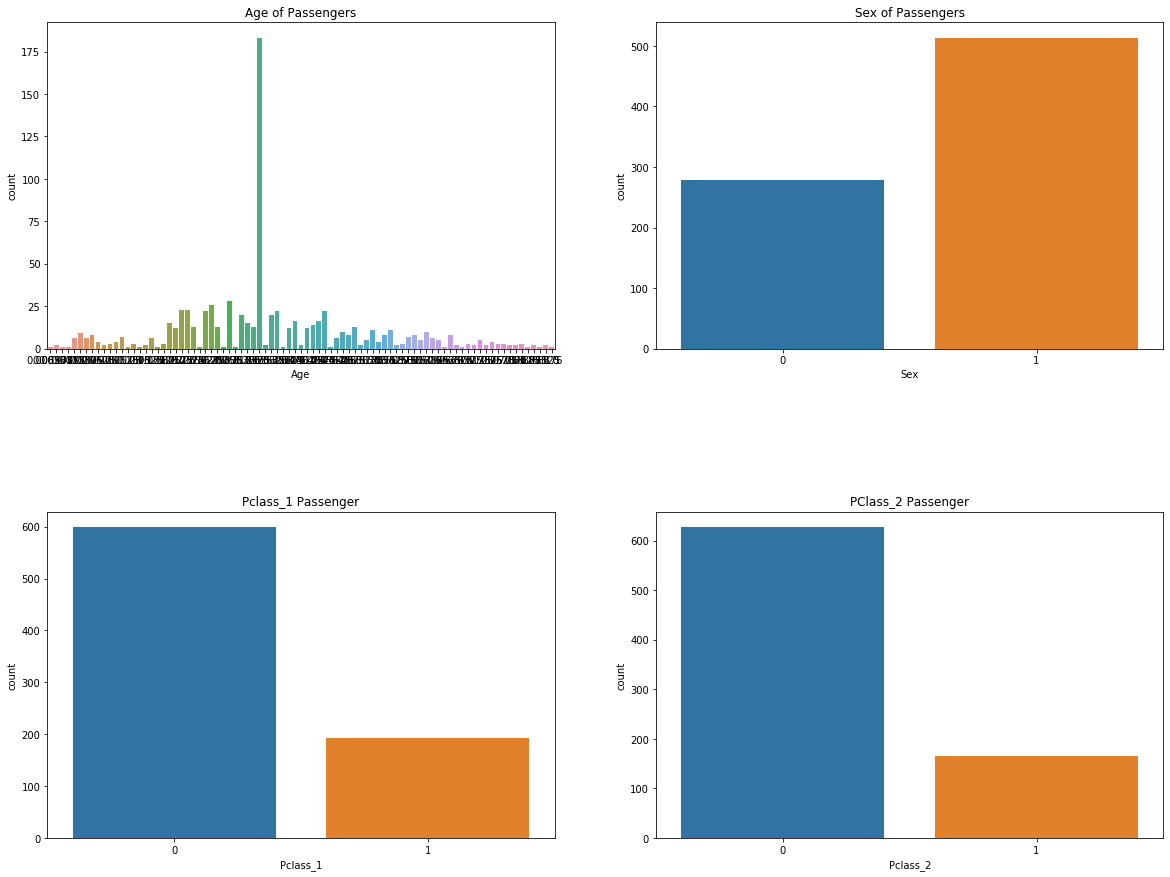

In [78]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot(x='Age',data=df,ax=ax[0,0])
ax[0,0].set_title('Age of Passengers')
sns.countplot(x='Sex',data=df,ax=ax[0,1])
ax[0,1].set_title('Sex of Passengers')
sns.countplot(x='Pclass_1',data=df,ax=ax[1,0])
ax[1,0].set_title('Pclass_1 Passenger')
sns.countplot(x='Pclass_2',data=df,ax=ax[1,1])
ax[1,1].set_title('PClass_2 Passenger')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

# Model Training

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

logReg = LogisticRegression(solver = 'lbfgs')

x_train = df.iloc[:,3:17]
y_train = df['Survived']
x_test=dft.iloc[:,3:17]
y_test=dft['Survived']



In [45]:
x_train.head()
y_train

0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     0
15     1
16     0
17     1
18     0
19     1
20     0
21     1
22     1
23     1
24     0
25     1
26     0
27     0
28     1
29     0
      ..
762    1
763    1
764    0
765    1
766    0
767    0
768    0
769    0
770    0
771    0
772    0
773    0
774    1
775    0
776    0
777    1
778    0
779    1
780    1
781    1
782    0
783    0
784    0
785    0
786    1
787    0
788    1
789    0
790    0
791    0
Name: Survived, Length: 792, dtype: int64

### Understand the data

(we can imagine that the data set means the machine parts selected are being examined by their dimensions
In our sample data set, `qualified` column is the category that each entry is in
each entry has two features: `length` and `width`
We want to classify new data according to its length and width

### Train Model

In [85]:
# import the model from sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# we choose k = 3 here, due to the small number of data we have
# there isn't a k suitable for all. Generally we want to choose a small odd number.
# large k is generally more costy
knn_model = KNeighborsClassifier(n_neighbors = 3) 

knn_model.fit(x_train, y_train) # train our model to the data set we have. The training set is all the data points

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

# Evaluate the model

In [86]:
y_pred = knn_model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [87]:
y_test

0     0
1     0
2     0
3     0
4     0
5     1
6     1
7     0
8     0
9     0
10    1
11    1
12    1
13    1
14    0
15    0
16    0
17    0
18    1
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    1
     ..
70    0
71    1
72    0
73    0
74    1
75    1
76    0
77    0
78    1
79    0
80    1
81    0
82    0
83    1
84    1
85    0
86    0
87    0
88    1
89    1
90    0
91    0
92    0
93    0
94    0
95    0
96    1
97    0
98    1
99    0
Name: Survived, Length: 100, dtype: int64

In [88]:
accuracy_score(y_test, y_pred)

0.82

# Effect of varying K values on the accuracy scores

In [89]:
# we can change k value to 1 - 20, and check the accuracy score
# Then we can choose the optimized k value
k_array = np.arange(1, 21, 2)
for k in k_array:
    knn_ex = KNeighborsClassifier(n_neighbors = k)
    knn_ex.fit(x_train, y_train)
    ac = accuracy_score(y_test, knn_ex.predict(x_test))
    print(k)
    print(ac)

1
0.81
3
0.82
5
0.82
7
0.82
9
0.8
11
0.79
13
0.8
15
0.82
17
0.81
19
0.82


### Predict Some Value

Now we can predict the category of new data

In [90]:
knn_model.predict([(1,0.2,0.05074862,0,1,0,0,1,0,0,0,0,0,1)])

array([0], dtype=int64)

The result from model predicting data with all the dimensions given gives the same survival result as the actual test data survival .

# Coefficient Test

In [98]:
coeff_df=pd.DataFrame(df.columns.delete([0]))
coeff_df.columns=['Feature']
coeff_df['Correlation']=pd.Series(knn_model.coef_[1])
coeff_df.sort_values(by='Correlation',ascending=False)

AttributeError: 'KNeighborsClassifier' object has no attribute 'coef_'